# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

* Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/
* Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

Finally, if you'd like to get started with Tensorflow, you can read through this tutorial: https://www.tensorflow.org/tutorials/keras/basic_classification. It uses a dataset called "fashion_mnist", which is identical in structure to the original digit mnist, but uses images of clothing rather than images of digits. The number of training examples and number of labels is the same. In fact, you can simply replace the code that loads "fashion_mnist" with "mnist" and everything should work fine.

In [ ]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that the data gets partitioned into training, development, and test sets. Also, a small subset of the training data called mini_train_data and mini_train_labels gets defined, which you should use in all the experiments below, unless otherwise noted.

In [2]:
# Load the digit data from https://www.openml.org/d/554 or from default local location '~/scikit_learn_data/...'
X, Y = fetch_openml(name='mnist_784', return_X_y=True, cache=False)


# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


### Part 1:

Show a 10x10 grid that visualizes 10 examples of each digit.

Notes:
* You can use `plt.rc()` for setting the colormap, for example to black and white.
* You can use `plt.subplot()` for creating subplots.
* You can use `plt.imshow()` for rendering a matrix.
* You can use `np.array.reshape()` for reshaping a 1D feature vector into a 2D matrix (for rendering).

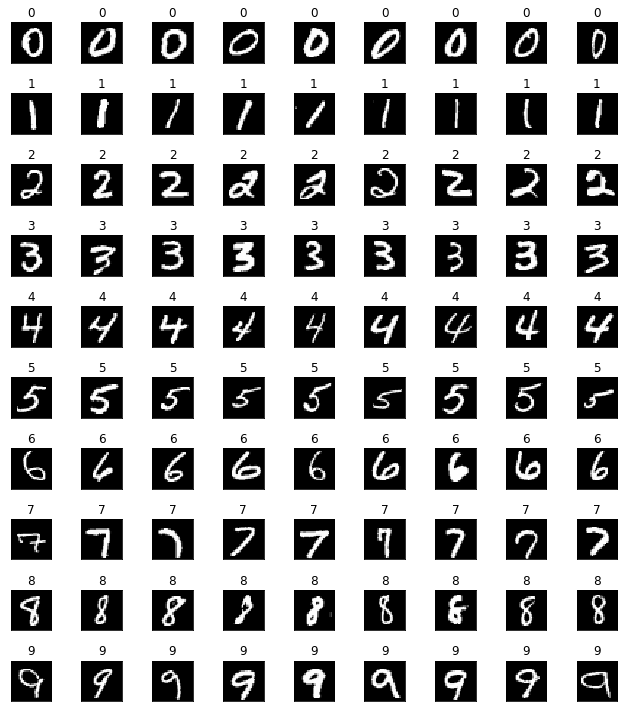

In [3]:
#def P1(num_examples=10):

### STUDENT START ###

def P1(num_examples=10):
    positions = [[] for i in range(10)] # list of list to host position of examples in our data

    count = 0 # counter to break out of loop once we collect enough data
    for index, item in enumerate(Y):

            if len(positions[int(item)]) < num_examples: # append index if we have not collect enough example
                positions[int(item)].append(index)
                count += 1

            if count > num_examples * 10: # break out of loop when enough example is collected
                break
                
    positions = [i for j in positions for i in j] # combine into one list

    
    fig, axes = plt.subplots(10, num_examples, figsize=(num_examples, 10)) # create subplots and resize
    
    for index, ax in enumerate(axes.reshape(-1)): # loop thru each ax
        
        _ = ax.imshow(X[positions[index],:].reshape(28,28), vmin=0, vmax=1, cmap='gray') # plot
        ax.set_title(Y[positions[index]]) # use actual number as title

        ax.get_yaxis().set_visible(False) # remove y axis
        ax.get_xaxis().set_visible(False) # remove x axis

    plt.tight_layout()
### STUDENT END ###

P1(9)

### Part 2:

Produce k-Nearest-Neighbors model with k = [1,3,5,7,9].  Evaluate and show teh performance of each model. For the 1-Nearest Neighbor model, show precision, recall, and F1 for each label. Which is the most difficult digit?

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `classification_report` to get precision, recall, and F1 results.

In [4]:
#def P2(k_values):

### STUDENT START ###

def P2(k_values):
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(mini_train_data, mini_train_labels)

        print('classification report with {} neightbors\n'.format(k))
        print(classification_report(test_labels, knn.predict(test_data)))
        print('------------------------------------\n\n')
### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
P2(k_values)

classification report with 1 neightbors

              precision    recall  f1-score   support

           0       0.92      0.95      0.94       862
           1       0.86      0.99      0.92      1001
           2       0.96      0.82      0.88       885
           3       0.89      0.86      0.87       949
           4       0.90      0.81      0.85       870
           5       0.84      0.84      0.84       785
           6       0.94      0.95      0.95       906
           7       0.84      0.92      0.88       939
           8       0.89      0.81      0.85       908
           9       0.77      0.82      0.79       895

    accuracy                           0.88      9000
   macro avg       0.88      0.88      0.88      9000
weighted avg       0.88      0.88      0.88      9000

------------------------------------


classification report with 3 neightbors

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       862
           

ANSWER: F1 score considers both precision and recall. The most difficult digit is 9 since 9 has the lowest F1 score in all KNN.

### Part 3:

Produce 1-Nearest Neighbor models using training data of various sizes.  Evaluate and show the performance of each model.  Additionally, show the time needed to measure the performance of each model.

Notes:
* Train on the train set.
* Evaluate on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `time.time()` to measure elapsed time of operations.

In [5]:
#def P3(train_sizes, accuracies):

### STUDENT START ###

def P3(train_sizes, accuracies):
    
    for size in train_sizes: # loop thru different sizes
        
        start = time.time() # track the begining time
        knn = KNeighborsClassifier(n_neighbors=1) # set up knn
        knn.fit(train_data[:size], train_labels[:size]) # train knn
        acc = sum(test_labels == knn.predict(test_data))/len(test_labels) # calculate accuracy
        accuracies.append(acc) # append to list
        
        print('classification report with {} training examples.\nIt took {:.2f} seconds.\n'.format(size, time.time()-start))
        
    return(accuracies)


### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
accuracies = []
P3(train_sizes, accuracies)

classification report with 100 training examples.
It took 0.99 seconds.

classification report with 200 training examples.
It took 1.77 seconds.

classification report with 400 training examples.
It took 3.37 seconds.

classification report with 800 training examples.
It took 6.44 seconds.

classification report with 1600 training examples.
It took 13.19 seconds.

classification report with 3200 training examples.
It took 28.28 seconds.

classification report with 6400 training examples.
It took 55.24 seconds.

classification report with 12800 training examples.
It took 7258.00 seconds.

classification report with 25600 training examples.
It took 278.90 seconds.



[0.6964444444444444,
 0.7873333333333333,
 0.8276666666666667,
 0.8713333333333333,
 0.8993333333333333,
 0.9258888888888889,
 0.9436666666666667,
 0.954,
 0.9635555555555556]

### Part 4:

Produce a regression model that predicts accuracy of a 1-Nearest Neighbor model given training set size. Show $R^2$ of the regression model and the accuracies it predicts for training set sizes 60000, 120000, and 1000000.  Show a lineplot of the actual accuracies and predicted accuracies vs. training set size.  What's wrong with using regression here?

Apply some transformation that makes the predictions more reasonable.  Show $R^2$ of the improved regression model and the accuracies it predicts for training set sizes 60000, 120000, and 1000000.  Show a lineplot of the actual accuracies and predicted accuracies vs. training set size.

Notes:
* Train the regression models on all of the (transformed) accuracies estimated in Problem 3.
* Evaluate the regression models on all of the (transformed) accuracies estimated in Problem 3.
* You can use `LinearRegression` to produce a linear regression model.
* Remember that the sklearn `fit()` functions take an input matrix X and output vector Y. So, each input example in X is a vector, even if it contains only a single value.

Result for normal linear model

R^2: 0.41
prediction for size of 60,000: 1.24
prediction for size of 120,000: 1.64
prediction for size of 1,000,000: 7.51



Result for log transformed logistic regression

R^2: 0.99
prediction for size of 60,000: 0.98
prediction for size of 120,000: 0.98
prediction for size of 1,000,000: 0.99


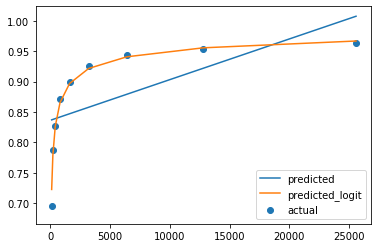

In [16]:
#def P4():

### STUDENT START ###

def r2_score(y_actual, y_predicted):
    '''function to calculate r2 score'''
    y_hat = np.average(y_actual)
    ssr = 0
    sst = 0
    
    for y_act, y_pre in zip(y_actual, y_predicted):
        sst += (y_act - y_hat)**2 # calculate total sum of square
        ssr += (y_act - y_pre)**2 # caluclate sum of sqare residual
    
    return(1 - ssr/sst)
    

def print_output(model, x_tf, y_tf, y_actual, y_predicted):
    '''print the result'''
    print('R^2: {:.2f}'.format(r2_score(y_actual, y_predicted))) # print r square
    
    for i in [60000, 120000, 1000000]: # loop to print accuracy predictions
        x_transform = x_tf(i) # transform x using the tranform function
        predicted = y_tf(model.predict(np.array([[x_transform]]))) # predict y and transform it
        print('prediction for size of {:,}: {:.2f}'.format(i, predicted[0]))
    
    
def P4():
    
    train_sizes_reshape = np.array(train_sizes).reshape(-1, 1) # reshape the train size

    # linear regression
    ols = LinearRegression()
    ols.fit(train_sizes_reshape, accuracies)
    predicted = ols.predict(train_sizes_reshape)

    print('Result for normal linear model\n')
    print_output(ols, lambda x : x, lambda x : x, accuracies, predicted) # there is no transformation, so x = x



    # linear regression with logit transformation, x are logged
    accuracies_transofrm = np.log([i/(1-i) for i in accuracies]) # transform the y for training. This will bond y between 0 to 1

    log_tf = lambda x: np.log(x) # function to transform x variable
    logit_tf = lambda x: np.exp(x)/(1 + np.exp(x)) # function to calculate actual y for based on logit link function

    ols_logit = LinearRegression()
    ols_logit.fit(log_tf(train_sizes_reshape), accuracies_transofrm)
    y = ols_logit.predict(log_tf(train_sizes_reshape)) # prediction of the model
    predicted_logit = logit_tf(y) # calculating the actual y based on transformation

    print('\n\n\nResult for log transformed logistic regression\n')
    print_output(ols_logit, log_tf, logit_tf, accuracies, predicted_logit)

    # creating the plot
    fig, ax = plt.subplots()
    ax.scatter(train_sizes, accuracies, label='actual')
    ax.plot(train_sizes, predicted, label='predicted')
    ax.plot(train_sizes, predicted_logit, label='predicted_logit')
    ax.legend()

### STUDENT END ###

P4()

ANSWER:Regression is linear. So the Y will continue increase as x increases. So the predicted accuracy will exceed 1. We have to apply transformation in order to bond the prediction between 0 and 1. I used logit link function based on https://en.wikipedia.org/wiki/Generalized_linear_model. I also used log of X instead of just X. This also improved the prediction.

### Part 5:

Produce a 1-Nearest Neighbor model and show the confusion matrix. Which pair of digits does the model confuse most often? Show the images of these most often confused digits.

Notes:
- Train on the mini train set.
- Evaluate performance on the dev set.
- You can use `confusion_matrix()` to produce a confusion matrix.

confusion matrix is:
 [[101   0   1   0   0   0   1   1   2   0]
 [  0 116   1   0   0   0   0   0   1   0]
 [  1   4  84   2   2   0   2   4   6   1]
 [  0   2   0  84   0   6   0   2   3   0]
 [  0   0   1   0  78   0   0   2   0  11]
 [  2   0   0   1   1  77   5   0   2   0]
 [  1   2   1   0   1   2  94   0   1   0]
 [  0   1   1   0   0   0   0  96   0   4]
 [  1   5   4   3   1   3   0   1  72   4]
 [  0   1   0   0   3   2   0   7   0  82]] 


the most confused pair: [4, 9]


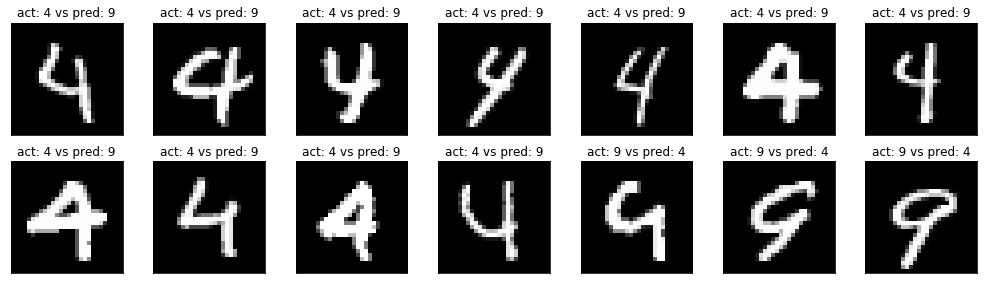

In [80]:
#def P5():

### STUDENT START ###

def P5():

    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(mini_train_data, mini_train_labels)
    predicted = knn.predict(dev_data)
    cm = confusion_matrix(dev_labels, predicted)
    print('confusion matrix is:\n', cm, '\n\n')
    
    # find the most confuse pair (i, j) by ranking error count for (i, j) + (j, i)
    pair = [0, 0] # store the most confused pair
    count = 0 # store the count for most confused pair
    for i in range(cm.shape[0]):
        for j in range(i + 1, cm.shape[1]):
            if cm[i, j] + cm[j, i] >= count: # if error for (i, j) andv (j, i) >= count then reset count and pair index
                count = cm[i, j] + cm[j, i]
                pair = [i, j]
    
    print('the most confused pair: {}'.format(pair))
    
    
    # get all the records that confused pair 4, 9
    position = []
    
    for i in range(len(dev_labels)): # loop thru all answers
        if dev_labels[i] != predicted[i]: 
            # add index to list by insert and append, so the 4, 9 will show up before 9, 4 makes graph nicer
            if ([dev_labels[i], predicted[i]] == [str(pair[0]), str(pair[1])]):
                position.insert(0, i) # if pair is 4, 9 insert into the list
            elif ([dev_labels[i], predicted[i]] == [str(pair[1]), str(pair[0])]):
                position.append(i) # if the pair is 9, 4 append into the list

        
    # plot out the most confused pair and where we get it wrong
    fig, axes = plt.subplots(2, 7, figsize=(14, 4))
    
    for i, ax in enumerate(axes.reshape(-1)): # loop thru each ax

        _ = ax.imshow(dev_data[position[i],:].reshape(28,28), vmin=0, vmax=1, cmap='gray') # plot
        ax.set_title('act: {} vs pred: {}'.format(dev_labels[position[i]], predicted[position[i]]))

        ax.get_yaxis().set_visible(False) # remove y axis
        ax.get_xaxis().set_visible(False) # remove x axis
    plt.tight_layout()
# ### STUDENT END ###

P5()

ANSWER: The most confused pair are 4 and 9. Some are actually really hard to get right, but I think we can improve the model to get some of it correct. 

### Part 6:

A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian, i.e., the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels like this: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values.

Apply your blur filter in 3 ways:
- Filter the training data but not the dev data
- Filter the dev data but not the training data
- Filter both training data and dev data

Show the accuracy resulting no filter and from each way you apply the filter.

Notes:
* Train on the (filtered) mini train set.
* Evaluate performance on the (filtered) dev set.
* There are Guassian blur filters available, for example in `scipy.ndimage.filters`. You are welcome to experiment with those, but you are likely to get the best results with the simplified version described above.

In [100]:
#def P6():
    
### STUDENT START ###

gaussian_kernel = np.zeros((3, 3))

sigma = 1
for i in range(gaussian_kernel.shape[0]):
    for j in range(gaussian_kernel.shape[1]):
        gaussian_kernel[i, j] = np.exp(-1 * ((i-1)**2 + (j-1)**2) / (2 * sigma**2))/(2 * np.pi * sigma**2)

gaussian_kernel/np.sum(gaussian_kernel)
### STUDENT END ###

#P6()

array([[0.07511361, 0.1238414 , 0.07511361],
       [0.1238414 , 0.20417996, 0.1238414 ],
       [0.07511361, 0.1238414 , 0.07511361]])

In [102]:
gaussian_kernel = np.zeros((3, 3))

sigma = 0.5
for i in range(gaussian_kernel.shape[0]):
    for j in range(gaussian_kernel.shape[1]):
        gaussian_kernel[i, j] = np.exp(-1 * ((i-1)**2 + (j-1)**2) / (2 * sigma**2))/(2 * np.pi * sigma**2)
        
gaussian_kernel/np.sum(gaussian_kernel)

array([[0.01134374, 0.08381951, 0.01134374],
       [0.08381951, 0.61934703, 0.08381951],
       [0.01134374, 0.08381951, 0.01134374]])

### Part 7:

Produce two Naive Bayes models and evaluate their performances.  Recall that Naive Bayes estimates P(feature|label), where each label is a categorical, not a real number.

For the first model, map pixel values to either 0 or 1, representing white or black - you should pre-process the data or use `BernoulliNB`'s `binarize` parameter.  Use some reasonable threshold to separate white from black.  Use `BernoulliNB` to produce the model.

For the second model, map pixel values to either 0, 1, or 2, representing white, gray, or black - you should pre-process the data.  Use some reasonable thresholds to separate white from gray from black.  Use `MultinomialNB` to produce the model. 

Show the Bernoulli model accuracy and the Multinomial model accuracy.

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* `sklearn`'s Naive Bayes methods can handle real numbers, but for this exercise explicitly do the mapping to categoricals. 

Does the multinomial version improve the results? Why or why not?

In [ ]:
#def P7():

### STUDENT START ###


    
### STUDENT END ###

#P7()

ANSWER:

### Part 8:

Search across several values for the LaPlace smoothing parameter (alpha) to find its effect on a Bernoulli Naive Bayes model's performance.  Show the accuracy at each alpha value.

Notes:
* Train on the mini train set.
* Vary alpha and evaulate performance using `GridSearchCV` to cross-validate.
* Cross-validation is based on partitions of the training data, so results will be a bit different than if you used the dev set to evaluate performance.

What is the best value for alpha? What is the accuracy when alpha is near 0? Is this what you'd expect?

In [ ]:
#def P8(alphas):

### STUDENT START ###



### STUDENT END ###

# alphas = {'alpha': [1.0e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
# nb = P8(alphas)
# print()
# print("Best alpha = ", nb.best_params_)

ANSWER:

### Part 9:

Produce a model using Guassian Naive Bayes, which is intended for real-valued features, and evaluate performance. You will notice that it does not work so well. Diagnose the problem and apply a simple fix so that the model accuracy is around the same as for a Bernoulli Naive Bayes model. Show the model accuracy before your fix and the model accuracy after your fix.  Explain your solution.

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* Consider the effects of theta and sigma.  These are stored in the model's `theta_` and `sigma_` attributes.

In [ ]:
#def P9():

### STUDENT END ###

# issues of overfitting
# think about number of parameters, how to reduce it
# 

### STUDENT END ###

#P9()

ANSWER:

### Part 10:

Because Naive Bayes produces a generative model, you can use it to generate digit images.

Produce a Bernoulli Naive Bayes model and then use it to generate a 10x20 grid with 20 example images of each digit. Each pixel output should be either 0 or 1, based on comparing some randomly generated number to the estimated probability of the pixel being either 0 or 1.  Show the grid.

Notes:
* You can use np.random.rand() to generate random numbers from a uniform distribution.
* The estimated probability of each pixel being 0 or 1 is stored in the model's `feature_log_prob_` attribute. You can use `np.exp()` to convert a log probability back to a probability.

How do the generated digit images compare to the training digit images?

In [ ]:
#def P10(num_examples):

### STUDENT START ###


### STUDENT END ###

#P10(20)

ANSWER:

### Part 11:

Recall that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior probability of the predicted class is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior probability and accuracy.  

Produce a Bernoulli Naive Bayes model.  Evaluate performance: partition the dev set into several buckets based on the posterior probabilities of the predicted classes - think of a bin in a histogram- and then estimate the accuracy for each bucket. So, for each prediction, find the bucket to which the maximum posterior probability belongs, and update "correct" and "total" counters accordingly.  Show the accuracy for each bucket.

Notes:
* Train on the mini train set.
* Evaluate perfromance on the dev set.
* Apply a reasonable Laplace smoothing (alpha) value.

How would you characterize the calibration for this Bernoulli Naive Bayes model?

In [ ]:
#def P11(buckets, correct, total):
    
### STUDENT START ###


                
### STUDENT END ###

# buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
# correct = [0 for i in buckets]
# total = [0 for i in buckets]

# P11(buckets, correct, total)

# for i in range(len(buckets)):
#     accuracy = 0.0
#     if (total[i] > 0): accuracy = correct[i] / total[i]
#     print('p(pred) is %.13f to %.13f    total = %3d    accuracy = %.3f' % (0 if i==0 else buckets[i-1], buckets[i], total[i], accuracy))

ANSWER:

### Part 12 EXTRA CREDIT:

Design new features to see if you can produce a Bernoulli Naive Bayes model with better performance.  Show the accuracy of a model based on the original features and the accuracy of the model based on the new features.

Here are a few ideas to get you started:
- Try summing or averaging the pixel values in each row.
- Try summing or averaging the pixel values in each column.
- Try summing or averaging the pixel values in each square block. (pick various block sizes)
- Try counting the number of enclosed regions. (8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0)

Notes:
* Train on the mini train set (enhanced to comprise the new features).
* Evaulate performance on the dev set.
* Ensure that your code is well commented.

In [ ]:
#def P12():

### STUDENT START ###


### STUDENT END ###

#P12()